In [2]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import re

In [4]:
# Configuración de visualización
#plt.style.use('seaborn')
sns.set_palette('Set2')
%matplotlib inline

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Carga del dataset
df = pd.read_csv('../data/raw/sex_data.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

# Información básica del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
display(df.describe(include='all'))

# Conteo de valores nulos
print("\nValores nulos por columna:")
display(df.isnull().sum())

# Tipos de datos
print("\nTipos de datos:")
display(df.dtypes)

Primeras 5 filas del dataset:


,id,first_name,second_name,sex
0,NC9IGWaYFjGk2suD2PsNUUW-MQYNLxlFt7Mu7q4YU3A=,jarberton,NaN,1
1,nLF2ScXNeYyYrSr48_64uN6T7KVlwNtMHxns7bPSdhw=,deysylvana,NaN,0
2,6T9_07YS9hDPRatv40hwLHGJ8F0wf5Xxd-xB8SUg7PQ=,yuynan,NaN,1
3,tLchZ2B2GYznnkeGd1fWLn9ZSDSIPAzKJudbJ6DAAyQ=,audre,victoria,0
4,JC0pSIMDjZNI9LAcQ0dZAGGGKyMLWhHbQEbOawcvujQ=,lam,xinhua,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113738 entries, 0 to 113737
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           113738 non-null  object
 1   first_name   113738 non-null  object
 2   second_name  52824 non-null   object
 3   sex          113738 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.5+ MB
None
Estadísticas descriptivas:


,id,first_name,second_name,sex
count,113738,113738,52824,113738.00
unique,113738,113733,9270,NaN
top,NC9IGWaYFjGk2suD2PsNUUW-MQYNLxlFt7Mu7q4YU3A=,antonio,maria,NaN
freq,1,2,2594,NaN
mean,NaN,NaN,NaN,0.41
std,NaN,NaN,NaN,0.49
min,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,1.00



Valores nulos por columna:


id                 0
first_name         0
second_name    60914
sex                0
dtype: int64


Tipos de datos:


id             object
first_name     object
second_name    object
sex             int64
dtype: object

In [6]:
# Función para análisis de calidad de datos
def analizar_calidad_datos(df):
	# Crear un DataFrame para el reporte de calidad
	quality_report = pd.DataFrame()

	# Calcular métricas por columna
	quality_report['tipo_dato'] = df.dtypes
	quality_report['n_registros'] = len(df)
	quality_report['n_nulos'] = df.isnull().sum()
	quality_report['pct_nulos'] = (df.isnull().sum() / len(df) * 100).round(2)
	quality_report['n_unicos'] = df.nunique()
	quality_report['pct_unicos'] = (df.nunique() / len(df) * 100).round(2)

	# Calcular duplicados por columna
	quality_report['n_duplicados'] = df.duplicated().sum()
	quality_report['pct_duplicados'] = (df.duplicated().sum() / len(df) * 100).round(2)

	return quality_report

# Generar reporte de calidad
reporte_calidad = analizar_calidad_datos(df)
display(reporte_calidad)

,tipo_dato,n_registros,n_nulos,pct_nulos,n_unicos,pct_unicos,n_duplicados,pct_duplicados
id,object,113738,0,0.00,113738,100.00,0,0.00
first_name,object,113738,0,0.00,113733,100.00,0,0.00
second_name,object,113738,60914,53.56,9270,8.15,0,0.00
sex,int64,113738,0,0.00,2,0.00,0,0.00


In [7]:
# Análisis de caracteres especiales en nombres
def detectar_caracteres_especiales(texto):
	if pd.isna(texto):
		return False
	patron = re.compile(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]')
	return bool(patron.search(texto))

# Aplicar la detección a las columnas de nombres
caracteres_especiales = {
	'first_name': df['first_name'].apply(detectar_caracteres_especiales).sum(),
	'second_name': df['second_name'].apply(detectar_caracteres_especiales).sum()
}

print("Número de registros con caracteres especiales:")
display(pd.Series(caracteres_especiales))

Número de registros con caracteres especiales:


first_name     0
second_name    0
dtype: int64

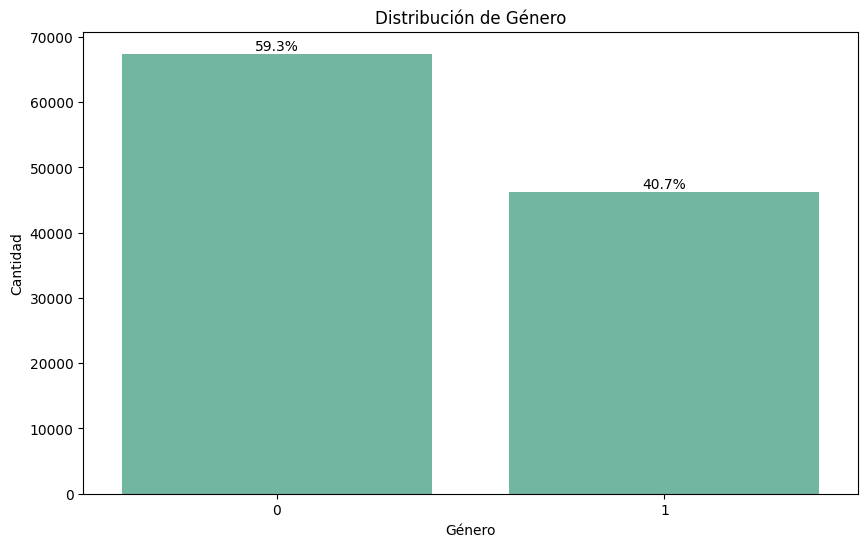

In [8]:
# Distribución de género
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

# Añadir porcentajes sobre las barras
total = len(df)
for p in plt.gca().patches:
	percentage = f'{100 * p.get_height() / total:.1f}%'
	plt.annotate(percentage,
				 (p.get_x() + p.get_width() / 2., p.get_height()),
				 ha='center',
				 va='bottom')
plt.show()

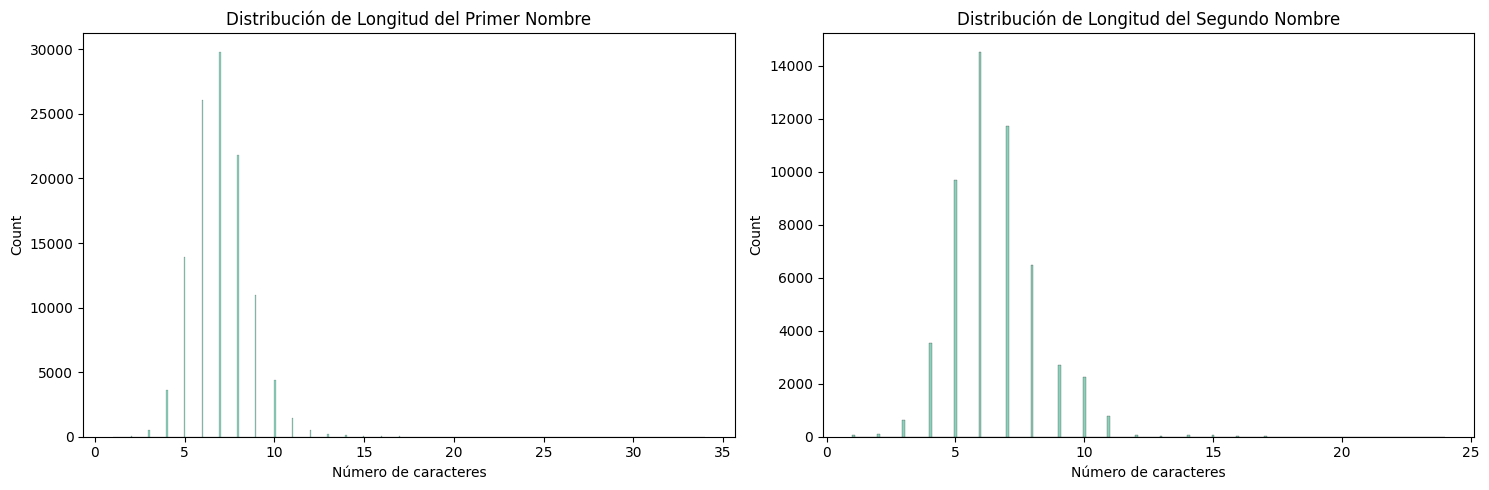

In [9]:
# Análisis de longitud de nombres
df['longitud_primer_nombre'] = df['first_name'].str.len()
df['longitud_segundo_nombre'] = df['second_name'].str.len()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='longitud_primer_nombre', ax=ax1)
ax1.set_title('Distribución de Longitud del Primer Nombre')
ax1.set_xlabel('Número de caracteres')

sns.histplot(data=df, x='longitud_segundo_nombre', ax=ax2)
ax2.set_title('Distribución de Longitud del Segundo Nombre')
ax2.set_xlabel('Número de caracteres')

plt.tight_layout()
plt.show()

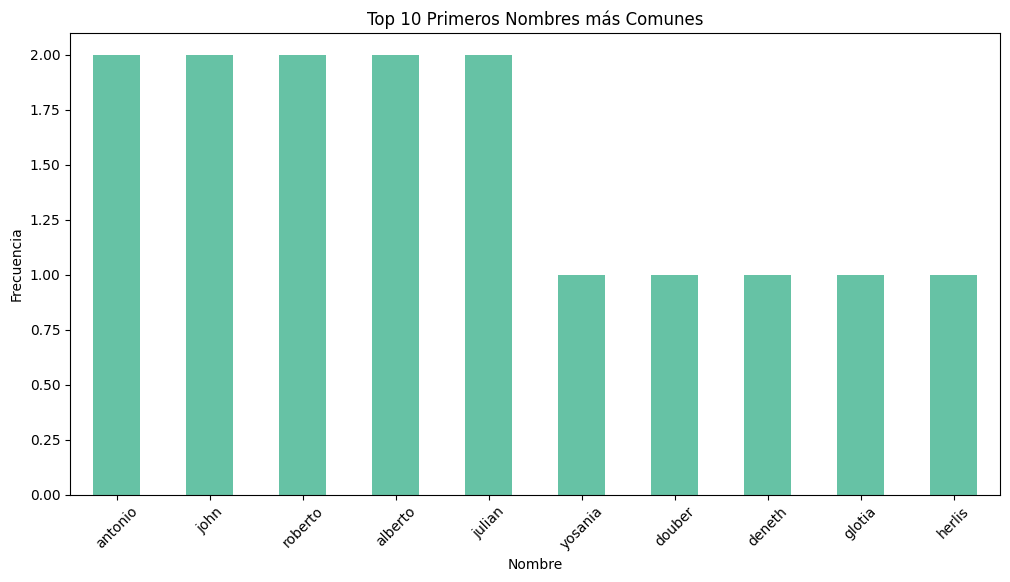

In [10]:
# Top 10 primeros nombres más comunes
plt.figure(figsize=(12, 6))
df['first_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Primeros Nombres más Comunes')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

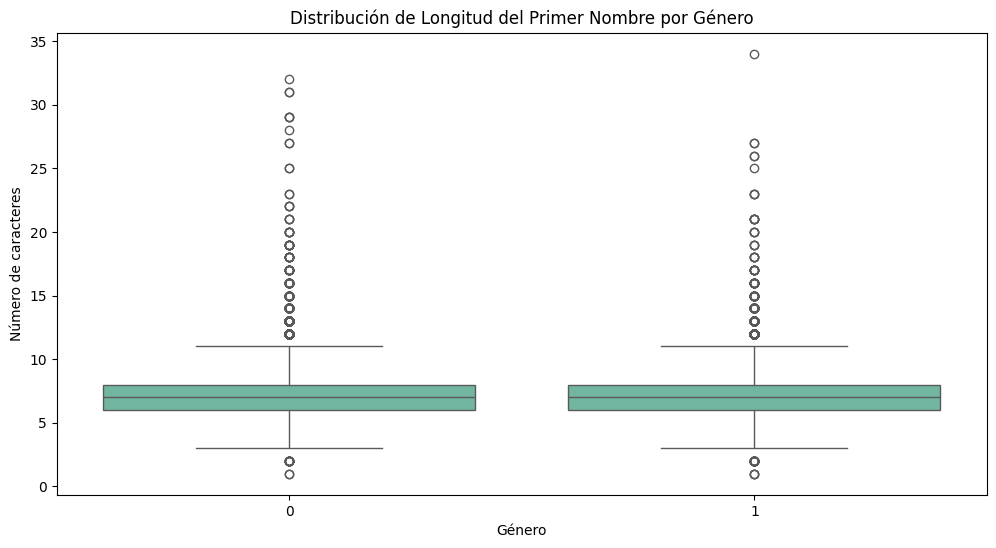

In [11]:
# Longitud promedio de nombres por género
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sex', y='longitud_primer_nombre')
plt.title('Distribución de Longitud del Primer Nombre por Género')
plt.xlabel('Género')
plt.ylabel('Número de caracteres')
plt.show()

In [12]:
# Top 5 nombres más comunes por género
top_nombres_por_genero = df.groupby('sex')['first_name'].value_counts().groupby(level=0).head(5)
print("\nTop 5 nombres más comunes por género:")
display(top_nombres_por_genero)


Top 5 nombres más comunes por género:


sex  first_name
0    a ida         1
     a licia       1
     a manda       1
     a nacarin     1
     a nney        1
1    alberto       2
     antonio       2
     john          2
     julian        2
     roberto       2
Name: count, dtype: int64

In [13]:
# Función para procesamiento de nombres
def procesar_nombre(nombre):
	if pd.isna(nombre):
		return nombre
	# Convertir a minúsculas
	nombre = nombre.lower()
	# Eliminar acentos
	nombre = unidecode(nombre)
	# Eliminar caracteres especiales
	nombre = re.sub(r'[^a-z\s]', '', nombre)
	# Eliminar espacios extras
	nombre = ' '.join(nombre.split())
	return nombre

# Aplicar procesamiento
df['first_name_processed'] = df['first_name'].apply(procesar_nombre)
df['second_name_processed'] = df['second_name'].apply(procesar_nombre)

# Mostrar ejemplos de procesamiento
print("Ejemplos de procesamiento de nombres:")
display(pd.DataFrame({
	'Original_First': df['first_name'].head(),
	'Processed_First': df['first_name_processed'].head(),
	'Original_Second': df['second_name'].head(),
	'Processed_Second': df['second_name_processed'].head()
}))

Ejemplos de procesamiento de nombres:


,Original_First,Processed_First,Original_Second,Processed_Second
0,jarberton,jarberton,NaN,NaN
1,deysylvana,deysylvana,NaN,NaN
2,yuynan,yuynan,NaN,NaN
3,audre,audre,victoria,victoria
4,lam,lam,xinhua,xinhua
